<a href="https://colab.research.google.com/github/Leonardopedroti/ANA_shapefile/blob/main/ANA_Shapefile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Acesso ao banco de dados de monitoramento da Agência Nacional de Águas (ANA) utilizando arquivo shapefile do IBGE.

In [ ]:
#Instalação e importação dos pacotes
!pip install --upgrade geopandas
!pip install --upgrade rasterio
!pip install --upgrade rasterstats
!pip install pyproj
!pip install shapely
!pip install hydrobr
!pip install seaborn
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import os
from rasterstats import zonal_stats
from shapely.geometry import Point
import hydrobr
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot
from PIL import Image
import folium

In [ ]:
!pip install Windrose
from windrose import WindroseAxes

In [ ]:
#Importação do arquivo Shapefile da base de dados do IBGE
adc = gpd.read_file('/content/SP_Municipios_2022.shp')

#Visualização do arquivo shapefile dos limites municipais de cada cidade do estado de Estado de São Paulo.
fig, ax = plt.subplots(figsize = (50, 25))
plt.xticks([])
plt.yticks([])
adc['geometry'].boundary.plot(ax = ax, color = 'black')
plt.legend(['Limites municipais'], fontsize='xx-large')
plt.title('Mapa com limites municipais do Estado de São Paulo', fontsize='xx-large')

<Axes: title={'center': 'Municípios selecionados'}>

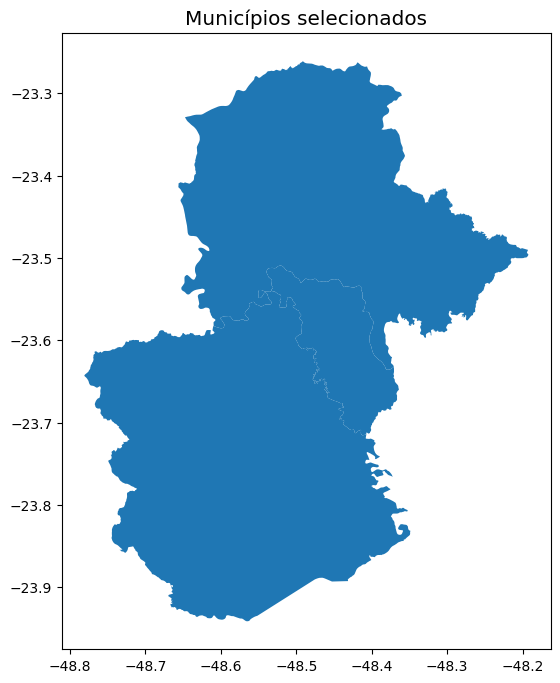

In [4]:
#Extração dos municipios de interesse com base no atributo "NM_MUN".
municipio = adc[adc['NM_MUN'].isin(['Buri', 'Campina do Monte Alegre', 'Angatuba'])]
fig, ax = plt.subplots(figsize=(9, 8))
plt.title('Municípios selecionados', fontsize='x-large')
municipio.plot(ax=ax)

In [5]:
#Importação do banco de dados da 'ANA' com as suas respectivas estações de monitoramento.
lista_estaçoes_geral = hydrobr.get_data.ANA.list_prec_stations()

#Extração das cidades de interesse.
lista_estaçoes_city = lista_estaçoes_geral[lista_estaçoes_geral['City'].isin(['BURI', 'CAMPINA DO MONTE ALEGRE', 'ANGATUBA'])]

#Conversão das cidades escolhidas em dataframe do Pandas
df = pd.DataFrame(lista_estaçoes_city)

#Extração dos atributos Lat/Long do respectivo dataframe
lat_long = ['Latitude', 'Longitude']
lat_long_extraidas = df[lat_long]

#Exportação do dataframe Lat/Long para um formato csv
lat_long_extraidas.to_csv('lat_long_extraidas.csv', index=False)

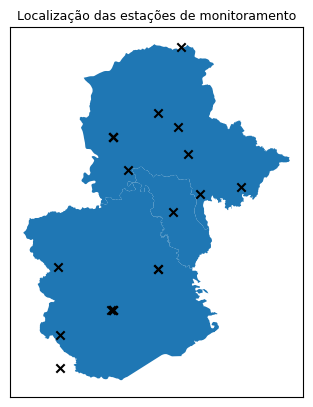

<Figure size 3000x2000 with 0 Axes>

In [6]:
#Importação do arquivo 'lat_long_extraidas.csv' para o drive
coordenadas_caminho = ('/content/lat_long_extraidas.csv')

#União dos arquivos shapefile com as coordenadas lat/long das estações de monitoramento
municipio = adc[adc['NM_MUN'].isin(['Buri', 'Campina do Monte Alegre', 'Angatuba'])]
municipio.plot()
lat_long = ['Latitude', 'Longitude']
lat_long_extraidas = df[lat_long]

#Adicionando marcações referente as estações de monitoramento
plt.scatter(lat_long_extraidas['Longitude'], lat_long_extraidas['Latitude'], color='black', marker='x')
plt.title('Localização das estações de monitoramento', fontsize='9')

#Removendo as coordenadas dos eixos x e y
plt.xticks([])
plt.yticks([])
plt.figure(figsize=(30, 20))
plt.show()

#Acesso direto ao banco de dados do IBGE

In [ ]:
import sys
sys.path.append('../')

sys.path = sys.path + ['/home/joaom/projects/geobr/python-package/.env/lib/python3.7/site-packages']

In [ ]:
!pip install geobr
!pip install s2
!pip install geojson
import geobr
import geopandas as gpd
from s2 import s2
import geojson
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
municipios = geobr.read_municipality(code_muni='all', year=2010)

In [130]:
# Localizar os municipios desejados
municipios_filtrados = municipios[municipios['name_muni'].str.contains('Buri', case=False)]

# Exibir os resultados
print(municipios_filtrados)

      code_muni              name_muni  code_state abbrev_state  \
27    1100452.0                Buritis        11.0           RO   
337   1703800.0    Buriti Do Tocantins        17.0           TO   
487   2102200.0                 Buriti        21.0           MA   
488   2102309.0           Buriti Bravo        21.0           MA   
489   2102325.0             Buriticupu        21.0           MA   
490   2102358.0             Buritirana        21.0           MA   
702   2202000.0       Buriti Dos Lopes        22.0           PI   
703   2202026.0      Buriti Dos Montes        22.0           PI   
714   2202307.0        Canto Do Buriti        22.0           PI   
1884  2904753.0             Buritirama        29.0           BA   
2343  3109303.0                Buritis        31.0           MG   
2344  3109402.0            Buritizeiro        31.0           MG   
3357  3508009.0                   Buri        35.0           SP   
3358  3508108.0               Buritama        35.0           S

<Axes: >

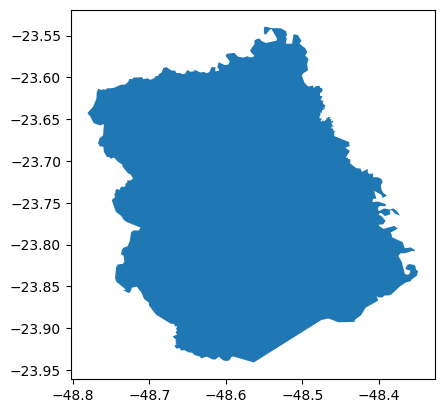

In [131]:
#Plotagem do Município
Buri = geobr.read_municipality(code_muni=3508009.0, year=2010)
Buri.plot()

In [128]:
#Importação do banco de dados da 'ANA' com as suas respectivas estações de monitoramento.
lista_estaçoes_geral2 = hydrobr.get_data.ANA.list_prec_stations()

#Extração das cidades de interesse.
lista_estaçoes_city2 = lista_estaçoes_geral2[lista_estaçoes_geral2['City'].isin(['BURI'])]

#Conversão das cidades escolhidas em dataframe do Pandas
df = pd.DataFrame(lista_estaçoes_city2)

#Extração dos atributos Lat/Long do respectivo dataframe
lat_long = ['Latitude', 'Longitude']
lat_long_extraidas2 = df[lat_long]

#Exportação do dataframe Lat/Long para um formato csv
lat_long_extraidas2.to_csv('lat_long_extraidas2.csv', index=False)

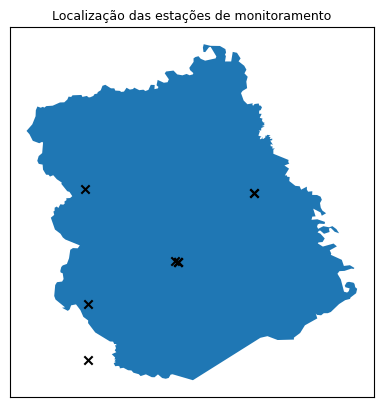

<Figure size 3000x2000 with 0 Axes>

In [129]:
#Importação do arquivo 'lat_long_extraidas.csv' para o drive
coordenadas_caminho = ('/content/lat_long_extraidas2.csv')

#União dos arquivos shapefile com as coordenadas lat/long das estações de monitoramento
municipio2 = Buri[Buri['name_muni'].isin(['Buri'])]
municipio2.plot()
lat_long = ['Latitude', 'Longitude']
lat_long_extraidas2 = df[lat_long]

#Adicionando marcações referente as estações de monitoramento
plt.scatter(lat_long_extraidas2['Longitude'], lat_long_extraidas2['Latitude'], color='black', marker='x')
plt.title('Localização das estações de monitoramento', fontsize='9')

#Removendo as coordenadas dos eixos x e y
plt.xticks([])
plt.yticks([])
plt.figure(figsize=(30, 20))
plt.show()